In [24]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale


In [19]:
data_df = pd.read_csv('./marketing-outliers.csv')
data_df.head(1)

,tv,web,radio,sales
0,0.916,1.689,0.208,1.204


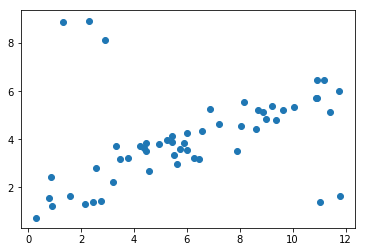

In [20]:
x = data_df.tv.values
y = data_df.sales.values

plt.scatter(x,y)
plt.show()


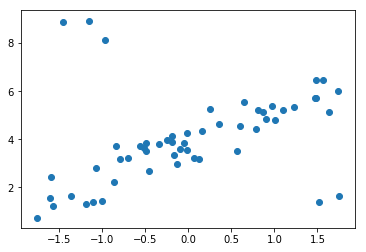

In [21]:
x_scale = scale(data_df.tv.values)
plt.scatter(x_scale,y)
plt.show()

In [22]:
from sklearn.linear_model import SGDRegressor

In [23]:
lr_huber = SGDRegressor(loss='huber', penalty='none', epsilon=1, max_iter=1000, tol=1e-3)

In [40]:
lr_huber.fit(x[:,np.newaxis],y)
# Print the slope of the line
print('Slope:', lr_huber.coef_)
# Output varies around 1.125

# Print the intercept parameter
print('Intercept term:', lr_huber.intercept_)
# Output varies around 3.787

Slope: [0.50182929]
Intercept term: [0.60733052]
